# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

from scipy.stats import t
from scipy.stats import norm
from scipy import stats

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


data.info()

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

Answer to Q1: Two sample t-test can be used because we are comparing two population means. 
CLT applies becuase we have large 4800 sample considered as independent.

Answer to Q2: Null hypothesis: that mean of callback rate for black and white applicants is equal. Alternative hypothesis: that mean of callback rate is not the same for the applicants.

In [6]:
w = data[data.race=='w']
b = data[data.race=='b']

In [7]:
w_c = w[w.call == 1]
w_nc = w[w.call == 0]

b_c = b[b.call == 1]
b_nc = b[b.call == 0]

In [8]:
a=w_c.call.value_counts()
b=w_nc.call.value_counts()

a2=b_c.call.value_counts()
b2=b_nc.call.value_counts()

In [9]:
counts=[a.values[0], b.values[0], a2.values[0], b2.values[0]]

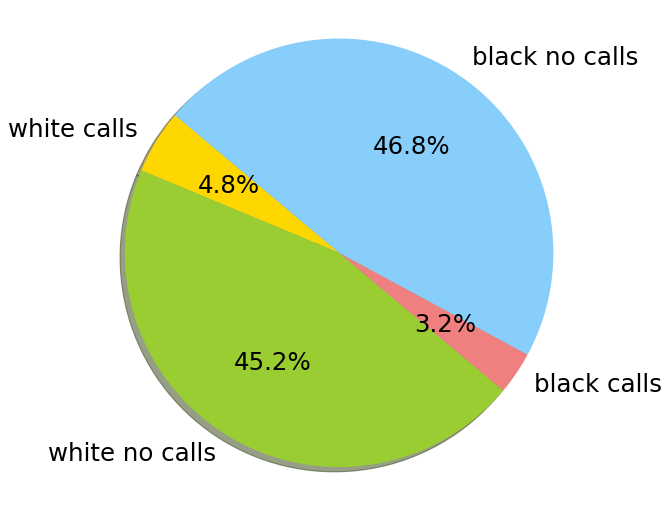

In [10]:
labels=['white calls', 'white no calls', 'black calls', 'black no calls']

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0, 0)  # explode 1st slice
 
plt.rcParams['font.size'] = 22.0
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.pie(counts, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [11]:
# Your solution to Q3 here
n = len(data)
# calculate sample sizes and callback rates
n_b = len(data[data['race'] == 'b']) 
n_w = len(data[data['race'] == 'w']) 
p_b = sum(data[data['race'] == 'b'].call)/n_b 
p_w = sum(data[data['race'] == 'w'].call)/n_w

In [12]:
# two-sample t-test
p_prop = (n_b*p_b+n_w*p_w)/(n_b+n_w)
std_error = np.sqrt(p_prop*(1-p_prop)*((1/n_b)+(1/n_w))) 

stats = (p_b-p_w)/std_error
pval = t.sf(abs(stats), n-1)*2

print('test statistic:',stats)
print('p value:',pval)

test statistic: -4.108412152434346
p value: 4.0493178875903686e-05


In [14]:
# Confidence level of 0.95
cl = 0.95

#Calculate the difference in proportions
diff = np.abs(p_w-p_b)

# margin of error
margin_error = norm.ppf(1-((1-cl)/2)) * std_error

# 95% ci
ci_lower, ci_upper = norm.interval(cl, loc=np.abs(diff), scale=std_error)

print("Margin of Error:", margin_error)
print("Confidence Interval:", ci_lower, ci_upper)

Margin of Error: 0.015281631502169232
Confidence Interval: 0.01675122270727635 0.04731448571161482


### ANSWER to QUESTION 3:

The p-value = 4.04 e-5 and 95% confidence interval = [0.017, 0.047] for the difference between the two proportions. 


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>


### QUESTION 4: 

Write a story describing the statistical significance in the context of the original problem.

### ANSWER to QUESTION 4:

From the analyses, we conclude that there is a statistically significant difference in callback rates for black and white sounding names.

### QUESTION 5: 

Does the analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

### ANSWER to QUESTION 5:

No, there are other factors, which we haven't analyzed that might contribute to this observation. These factors could be be sex, education level and experience. 